# End to end multi-class dog breed classification
This notebook builds an end to end multi class image classifier using Tensorflow 2.0 and Tensorflow Hub.

## 1.problem
Identifying the breed of a dog given an image of a dog. When I am sitting in a cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2.Data
The data we are using is from kaggle's dog breed identification competition.
https://www.kaggle.com/competitions/dog-breed-identification

## 3.Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4.Features
Some information about the data:
* we are dealing with images(unstructured data), so it is probably best we use deep learning/transfer learning
* There are 120 breeds of dogs (This means there are 120 different classes).
* There are around 10,000+ images in the training set(These images have labels)
* There are around 10,000+ images in the test set(These images have no labels), because we will want to predict them.
https://www.kaggle.com/competitions/dog-breed-identification/data

Note: To Unzip the data in colab, use `!unzip "source path" -d "destination path"`

### Get the workspace ready
* Import tensorflow
* Import tensorflow hub
* make sure you are using GPU

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)

#  Check for GPU availability
print("GPU", "available GPU!" if tf.config.list_physical_devices("cuda") else "not available ")

2.6.0
0.12.0
GPU not available 


In [2]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

gpu_ok = tf.config.list_physical_devices('GPU')

# print(tf.test.is_gpu_available())
print("tf version:", tf.__version__)
print("use GPU:", gpu_ok)

tf version: 2.6.0
use GPU: []


In [3]:
# Getting our data ready (turning into Tensors)
# With all ML models, our data has to be in numerical format, so that is what we will do first, turning our images into tensors(Numerical representation)
#  Lets start by accessing our data and checking out the labels
# Check out the labels of our data

import pandas as pd
labels_csv = pd.read_csv("data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
# How many images are there of each breed?
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<AxesSubplot:>

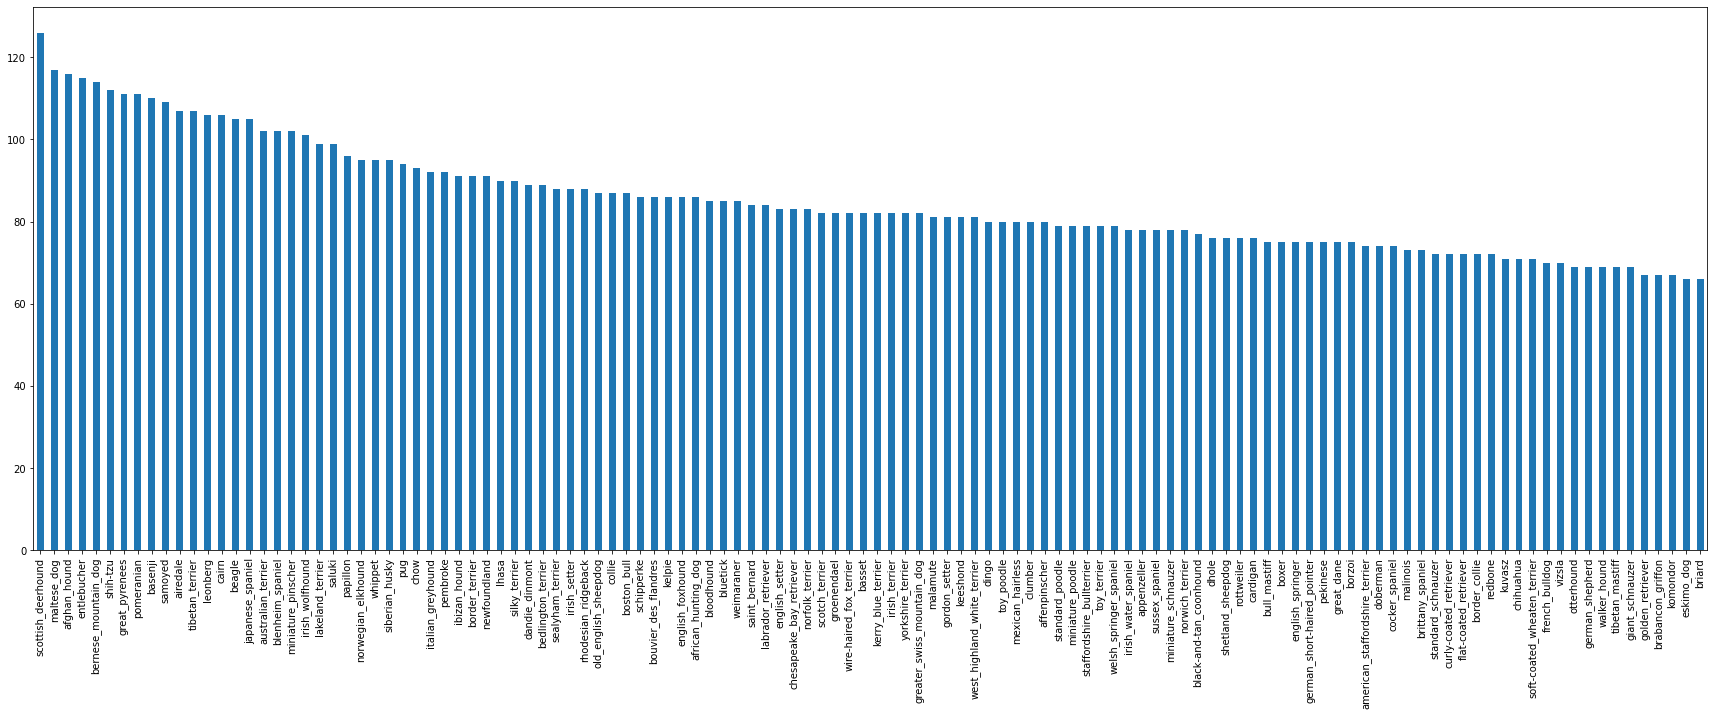

In [7]:
labels_csv["breed"].value_counts().plot.bar(figsize=(30,10))

In [8]:
labels_csv.breed.value_counts().median()

82.0